In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Settings
n = 1000
random.seed(42)

# Sample data pools
cities = ['Chennai', 'Delhi', 'Mumbai', 'Kolkata', 'Bangalore', 'Hyderabad']
carriers = ['DHL', 'FedEx', 'BlueDart', 'Delhivery']
vehicles = ['Truck', 'Van', 'Container', 'Bike']
weather = ['Clear', 'Rain', 'Fog', 'Storm']
traffic = ['Low', 'Medium', 'High']

# Generate records
data = []
for i in range(n):
    origin = random.choice(cities)
    destination = random.choice([c for c in cities if c != origin])
    distance_km = np.round(np.random.normal(loc=500, scale=150), 1)
    weight_kg = np.round(np.random.uniform(10, 2000), 1)
    shipment_date = datetime(2023, 1, 1) + timedelta(days=random.randint(0, 365))
    carrier = random.choice(carriers)
    vehicle = random.choice(vehicles)
    weather_cond = random.choices(weather, weights=[0.6, 0.2, 0.15, 0.05])[0]
    traffic_cond = random.choices(traffic, weights=[0.3, 0.5, 0.2])[0]

    # Delay logic
    delay_prob = 0.2
    if weather_cond in ['Fog', 'Storm'] or traffic_cond == 'High':
        delay_prob += 0.3
    delay = np.random.choice([0, 1], p=[1 - delay_prob, delay_prob])

    data.append([
        f"SHP{i+1:04d}", origin, destination, distance_km, weight_kg, shipment_date.strftime("%Y-%m-%d"),
        carrier, vehicle, weather_cond, traffic_cond, delay
    ])

# Create DataFrame
columns = ['shipment_id', 'origin', 'destination', 'distance_km', 'weight_kg', 'shipment_date',
           'carrier_name', 'vehicle_type', 'weather_condition', 'traffic_condition', 'delay']
df = pd.DataFrame(data, columns=columns)

# Save CSV
df.to_csv('freight_shipments.csv', index=False)
df.head()


,shipment_id,origin,destination,distance_km,weight_kg,shipment_date,carrier_name,vehicle_type,weather_condition,traffic_condition,delay
0,SHP0001,Hyderabad,Chennai,486.9,1538.7,2023-01-13,BlueDart,Van,Clear,Medium,0
1,SHP0002,Hyderabad,Bangalore,524.7,12.1,2023-02-14,Delhivery,Truck,Clear,Low,0
2,SHP0003,Bangalore,Hyderabad,795.2,798.2,2023-01-14,FedEx,Bike,Clear,Medium,0
3,SHP0004,Chennai,Mumbai,520.3,26.3,2023-12-24,Delhivery,Container,Clear,Low,0
4,SHP0005,Mumbai,Chennai,631.1,948.9,2023-02-17,Delhivery,Truck,Clear,Medium,0


Data Cleaning & Exploratory Data Analysis (EDA)

In [2]:
# Load necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/freight_shipments.csv")

# Quick look at the data
print(df.shape)
df.head()


(1000, 11)


,shipment_id,origin,destination,distance_km,weight_kg,shipment_date,carrier_name,vehicle_type,weather_condition,traffic_condition,delay
0,SHP0001,Hyderabad,Chennai,486.9,1538.7,2023-01-13,BlueDart,Van,Clear,Medium,0
1,SHP0002,Hyderabad,Bangalore,524.7,12.1,2023-02-14,Delhivery,Truck,Clear,Low,0
2,SHP0003,Bangalore,Hyderabad,795.2,798.2,2023-01-14,FedEx,Bike,Clear,Medium,0
3,SHP0004,Chennai,Mumbai,520.3,26.3,2023-12-24,Delhivery,Container,Clear,Low,0
4,SHP0005,Mumbai,Chennai,631.1,948.9,2023-02-17,Delhivery,Truck,Clear,Medium,0


In [3]:
# Check for missing values
df.isnull().sum()

# Check data types
df.dtypes


,0
shipment_id,object
origin,object
destination,object
distance_km,float64
weight_kg,float64
shipment_date,object
carrier_name,object
vehicle_type,object
weather_condition,object
traffic_condition,object


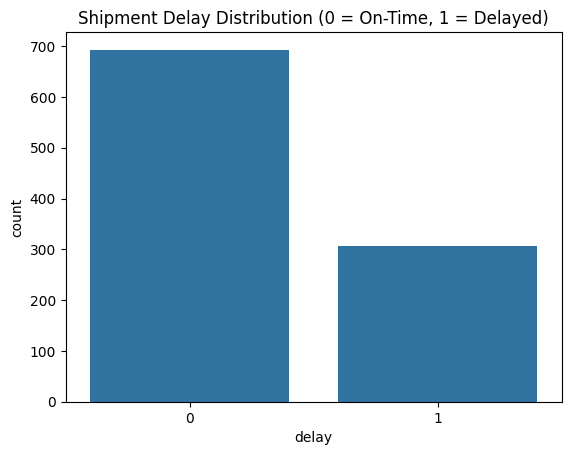

In [4]:
# Count of delayed ___   on-time shipments
sns.countplot(data=df, x='delay')
plt.title("Shipment Delay Distribution (0 = On-Time, 1 = Delayed)")
plt.show()


Delay Rate by Weather:
 weather_condition
Fog      0.554054
Storm    0.302326
Rain     0.269231
Clear    0.259567
Name: delay, dtype: float64

Delay Rate by Traffic:
 traffic_condition
High      0.545977
Low       0.281150
Medium    0.241715
Name: delay, dtype: float64


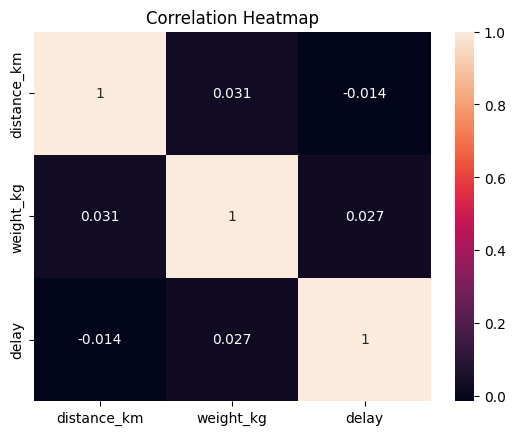

In [5]:
# Delay rate by weather condition
delay_by_weather = df.groupby('weather_condition')['delay'].mean().sort_values(ascending=False)
print("Delay Rate by Weather:\n", delay_by_weather)

# Delay rate by traffic condition
delay_by_traffic = df.groupby('traffic_condition')['delay'].mean().sort_values(ascending=False)
print("\nDelay Rate by Traffic:\n", delay_by_traffic)

# Heatmap of correlation for numeric columns
sns.heatmap(df[['distance_km', 'weight_kg', 'delay']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Drop non-informative columns
df_model = df.drop(columns=['shipment_id', 'shipment_date'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Confirm shape
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()


Encoded dataset shape: (1000, 24)


,distance_km,weight_kg,delay,origin_Chennai,origin_Delhi,origin_Hyderabad,origin_Kolkata,origin_Mumbai,destination_Chennai,destination_Delhi,...,carrier_name_Delhivery,carrier_name_FedEx,vehicle_type_Container,vehicle_type_Truck,vehicle_type_Van,weather_condition_Fog,weather_condition_Rain,weather_condition_Storm,traffic_condition_Low,traffic_condition_Medium
0,486.9,1538.7,0,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
1,524.7,12.1,0,False,False,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,795.2,798.2,0,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,520.3,26.3,0,True,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
4,631.1,948.9,0,False,False,False,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True


In [7]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('delay', axis=1)
y = df_encoded['delay']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])


Training samples: 800
Test samples: 200


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)


Confusion Matrix:
 [[130  12]
 [ 47  11]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.82       142
           1       0.48      0.19      0.27        58

    accuracy                           0.70       200
   macro avg       0.61      0.55      0.54       200
weighted avg       0.66      0.70      0.66       200



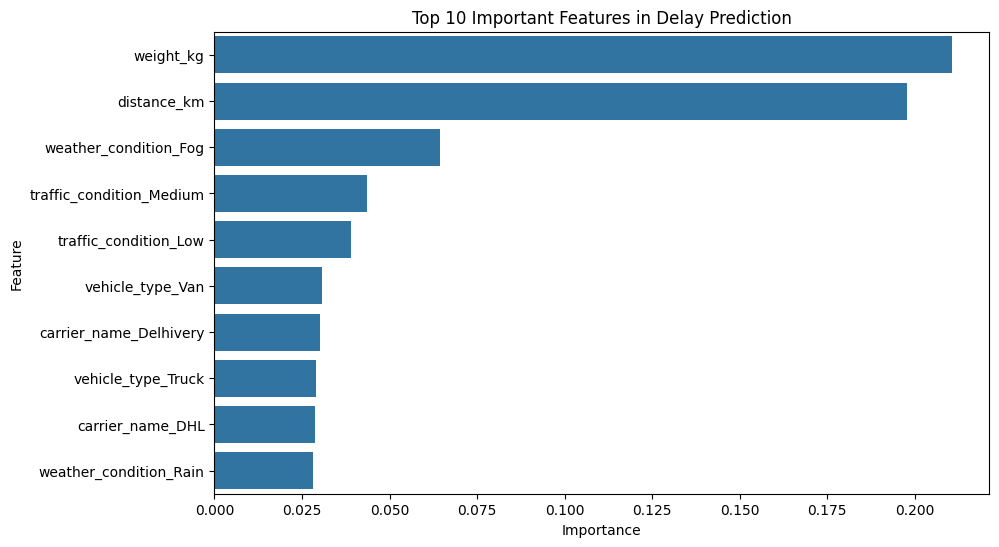

In [11]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features in Delay Prediction")
plt.show()


In [12]:
import joblib

# Save model
joblib.dump(rf_model, 'freight_delay_model.pkl')

# Save encoded feature names for use during prediction
joblib.dump(X.columns.tolist(), 'model_features.pkl')


['model_features.pkl']

In [15]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.8 MB/s eta 0:00:00


In [16]:
import streamlit as st
import pandas as pd
import joblib

# Load model and feature columns
model = joblib.load("freight_delay_model.pkl")
feature_cols = joblib.load("model_features.pkl")

st.title("🚛 Freight Delay Prediction App")
st.markdown("Upload a CSV file with shipment details and predict if shipments will be **Delayed** or **On-Time**.")

uploaded_file = st.file_uploader("Upload your CSV file", type=["csv"])

if uploaded_file:
    input_df = pd.read_csv(uploaded_file)

    # Preprocess input
    try:
        df_input = input_df.drop(columns=['shipment_id', 'shipment_date'])
    except:
        st.error("Make sure 'shipment_id' and 'shipment_date' are included in the file.")

    df_input_encoded = pd.get_dummies(df_input, drop_first=True)

    # Align columns
    missing_cols = set(feature_cols) - set(df_input_encoded.columns)
    for col in missing_cols:
        df_input_encoded[col] = 0
    df_input_encoded = df_input_encoded[feature_cols]

    # Predict
    predictions = model.predict(df_input_encoded)
    input_df['Predicted Delay'] = predictions
    input_df['Predicted Delay'] = input_df['Predicted Delay'].map({1: 'Delayed', 0: 'On-Time'})

    st.success("✅ Predictions completed!")
    st.dataframe(input_df)

    # Download
    csv = input_df.to_csv(index=False).encode('utf-8')
    st.download_button("📥 Download Results CSV", data=csv, file_name="freight_predictions.csv", mime="text/csv")


2025-06-15 15:06:30.476 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 15:06:30.708 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-15 15:06:30.709 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 15:06:30.710 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 15:06:30.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 15:06:30.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 15:06:30.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-15 15:06:30.714 Thread 'MainThread': mi